Planteemos el problema del interferometro de Young: 

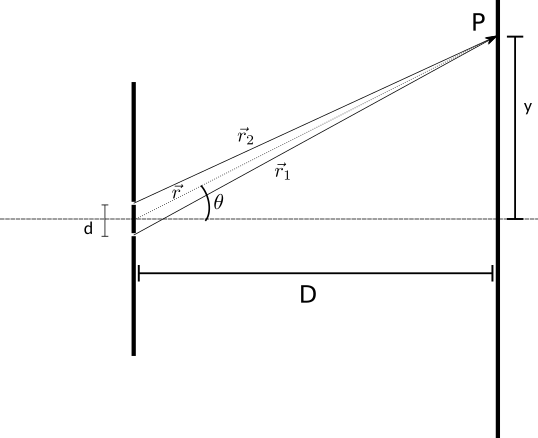

Lo que nos interesa es calcular la intensidad sobre la pantalla, en particular en el punto arbitrario $P$. Ya vimos que la intensidad cuando se superponen dos ondas es la siguiente: 

$$  \left \langle I\right \rangle \propto \vec{E} \cdot \vec{E}^* = \dfrac{E_{01}^2}{|\vec{r}_1  |^2} + \dfrac{E_{02}^2}{|\vec{r}_2  |^2} + 2\dfrac{E_{01}E_{02}}{|\vec{r}_1  ||\vec{r}_2  |}~\cos\left (\Delta \phi \right ) ~~~~ (1)$$

en donde $\Delta \phi = k\big ( |\vec{r}_1|-|\vec{r}_2|\big )$ que es la diferencia de caminos ópticos. En este caso estamos considerando que las 2 fuentes que se originan en las 2 rendijas no tienen diferencias de fase incial, y que todo el sistema esta inmerso en un mismo medio con mismo indice de refraccion. 

Además, dado que $\Delta \phi$ cambia mucho más que los valores $ |\vec{r}_1|, |\vec{r}_2|$, en los denominadores podemos aproximar $ |\vec{r}_1| = |\vec{r}_2| = \sqrt{D^2 + y^2} = |\vec{r}|$ para los puntos sobre la pantalla. Este vector $\vec{r}$ está dibujado con una línea punteada y es el que va desde el punto medio entre las rendijas y el punto P, y forma un ángulo $\theta$ con el eje horizontal. 

Bueno necesitamos calcular $ |\vec{r}_1|, |\vec{r}_2|$: 
\begin{matrix}
\vec{r}_1 = \left (  D, y\right ) -  \left (0, -\frac{d}{2} \right) = \left ( D, y+\frac{d}{2} \right ) &  & |\vec{r}_1| = \sqrt{D^2 + \left(y+\frac{d}{2}\right)^2}\\ 
 & ~~\Longrightarrow~~ & \\ 
\vec{r}_2 = \left (  D, y\right ) - \left(0, \frac{d}{2} \right) = \left ( D, y-\frac{d}{2} \right )&  & |\vec{r}_2| = \sqrt{D^2 + \left(y-\frac{d}{2}\right)^2}
\end{matrix}


La diferencia $ |\vec{r}_1|-|\vec{r}_2|$ no es muy agradable así que queremos ver como podemos hacer alguna aproximación para expresarla de forma más clara. Empecemos por sacar factor común $D$: 

$$ |\vec{r}_1|-|\vec{r}_2| = \sqrt{D^2 + \left(y+\frac{d}{2}\right)^2} - \sqrt{D^2 + \left(y-\frac{d}{2}\right)^2} = D\left [  \sqrt{1+\left ( \frac{y}{D}+\frac{d}{2D} \right )^2}-\sqrt{1+\left ( \frac{y}{D}-\frac{d}{2D} \right )^2}\right ]$$

Ahora podemos usar que $d \ll D$ (esto es simplemente algo que puedo elegir hacer cuando hago el experimento), así que lo que vamos a hacer es definir $x = \frac{d}{2D}$ y hacer un Taylor de la función $f(x) = \sqrt{1+\left ( \frac{y}{D}\pm x \right )^2}$ alrdedor de $x_0 = 0$ de manera de que podamos aproximar $f(x) \approx f(0) + f'(0) ~ x$ si tiramos los ordenes $\mathcal{O}(x^2)$. 
 


Para eso necesitamos $f(0)$ y $f'(0)$: 

$f(0) = \sqrt{1+\left(\frac{y}{D}\right)^2}$
 
y

$f'(x) = \pm \dfrac{\pm x+\frac{y}{D}}{\sqrt{1+\left(\frac{y}{D}\pm x\right)^2}} \Longrightarrow f'(0) = \pm \dfrac{\frac{y}{D}}{\sqrt{1+\left(\frac{y}{D}\right)^2}}=\pm \dfrac{ y}{\sqrt{D^2+y^2}}$

y entonces : 

$ f(x) = \sqrt{1+\left ( \frac{y}{D}\pm x \right )^2} \approx \sqrt{1+\left(\frac{y}{D}\right)^2} \pm \dfrac{y}{\sqrt{D^2+y^2}} x$

Es decir (reemplazando $x$ por $\frac{d}{2D}$): 

$\sqrt{1+\left ( \frac{y}{D}\pm \frac{d}{2D} \right )^2} \approx \sqrt{1+\left(\frac{y}{D}\right)^2} \pm \dfrac{y}{\sqrt{D^2+y^2}} \dfrac{d}{2D}$

Con esto vuelvo a la ec. para $|\vec{r}_1|-|\vec{r}_2|$ y me queda lo siguiente:

$ |\vec{r}_1|-|\vec{r}_2| = D\left [  \sqrt{1+\left ( \frac{y}{D}+\frac{d}{2D} \right )^2}-\sqrt{1+\left ( \frac{y}{D}-\frac{d}{2D} \right )^2}\right ] \approx D \left[ \sqrt{1+\left(\frac{y}{D}\right)^2} + \dfrac{y}{\sqrt{D^2+y^2}} \dfrac{d}{2D} - \sqrt{1+\left(\frac{y}{D}\right)^2} + \dfrac{y}{\sqrt{D^2+y^2}} \dfrac{d}{2D}\right ] = D \left[  \dfrac{y}{\sqrt{D^2+y^2}} \dfrac{d}{2D} + \dfrac{y}{\sqrt{D^2+y^2}} \dfrac{d}{2D}\right ] = \dfrac{y}{\sqrt{D^2+y^2}} d$

Finalmente, observando que $\sin \theta = \dfrac{y}{\sqrt{D^2+y^2}}$ me queda $|\vec{r}_1|-|\vec{r}_2| \approx d \sin \theta$. 

Hagamos algunos graficos con valores razonables. Para eso, defino una funcion que calcula la intensidad exacta según la formula (1) y otra que lo haga con las aproximaciones que hicimos. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def I_full(y, d, D, E10, E20, phi1, phi2, wl):
    k = 2*np.pi/wl    
    r1 = np.sqrt(D**2+(y-d/2)**2)
    r2 = np.sqrt(D**2+(y+d/2)**2)        
    return E10**2/r1**2+E20**2/r2**2 + (E10*E20)/(r1*r2) * np.cos(k*(r1-r2)+phi2-phi1)

def I_aprox(y, d, D, E10, E20, phi1, phi2, wl):
    k = 2*np.pi/wl    
    r1 = np.sqrt(D**2+(y)**2)
    r2 = np.sqrt(D**2+(y)**2)        
    return E10**2/r1**2+E20**2/r2**2 + (E10*E20)/(r1*r2) * np.cos(k*d*y/np.sqrt(y**2+D**2)+phi2-phi1)

Pongamos algunos valores razonables. Por ejemplo pongamos que la amplitud de ambos campos es igual, que $d = 1$ mm, $D = 2$ m y $\lambda = 500$ nm. 

In [47]:
#defino los parametros
E10 = 1
E20 = 1
d = 1e-3  
D = 2 
phi1, phi2 = 0, 0
wl = 500e-9 

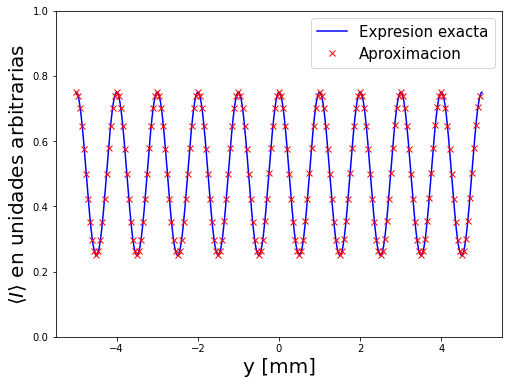

In [48]:
plt.figure(figsize = (8, 6))
ymax = .5e-2
y = np.linspace(-ymax, ymax, 10000)
Ifull = I_full(y, d, D, E10, E20, phi1, phi2, wl)
Iaprox = I_aprox(y, d, D, E10, E20, phi1, phi2, wl)
plt.plot(y*1e3, Ifull, 'b', label = 'Expresion exacta')
plt.plot(y[::50]*1e3, Iaprox[::50], 'rx', label = 'Aproximacion')
plt.legend(loc = 'upper right', fontsize = 15)
plt.ylim(0, 1), plt.ylabel(r'$\left \langle I\right \rangle$ en unidades arbitrarias', size = 20), plt.xlabel('y [mm]', size = 20);

Podemos poner valores para ver que pasa cuando la aproximación falla. Por ejemplo, hagamos que la distancia entre las rendijas y la pantalla sea igual que la distancia entre rendijas: $d = D = 1$ mm. 

In [49]:
#defino los parametros
E10 = 1
E20 = 1
d = 1e-3  
D = 1e-3
phi1, phi2 = 0, 0
wl = 500e-9 

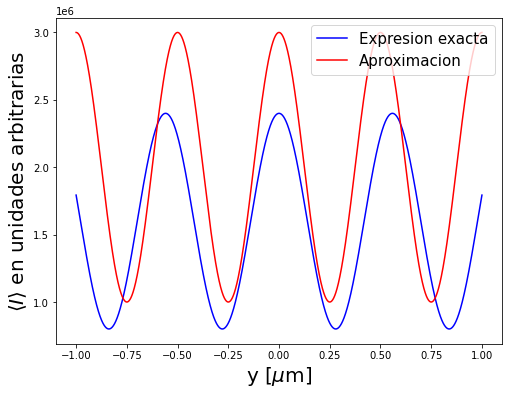

In [50]:
plt.figure(figsize = (8, 6))
ymax = 1e-6
y = np.linspace(-ymax, ymax, 10000)
Ifull = I_full(y, d, D, E10, E20, phi1, phi2, wl)
Iaprox = I_aprox(y, d, D, E10, E20, phi1, phi2, wl)
plt.plot(y*1e6, Ifull, 'b', label = 'Expresion exacta')
plt.plot(y[::1]*1e6, Iaprox[::1], 'r', label = 'Aproximacion')
plt.legend(loc = 'upper right', fontsize = 15)
plt.ylabel(r'$\left \langle I\right \rangle$ en unidades arbitrarias', size = 20), plt.xlabel('y [$\mu$m]', size = 20);